## Импорт необходимых библиотек

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Функция вывода данных

In [2]:
def print_data(classifier, coordinates, labels, prediction, labels_test):
    print("Предстказанные и истинные значения")
    print(prediction)
    print(labels_test)
    
    print("Матрица ошибок")
    print(confusion_matrix(labels_test, prediction))
    print("Точность классификации: ", accuracy_score(prediction, labels_test))
    print("Значения полноты, точности, f1-меры и аккуратности")
    print(classification_report(labels_test, prediction))
    print("Значение площади под кривой ошибок (AUC ROC)")
    print(roc_auc_score(labels_test, prediction))
    print("Область принятия решений")
    plt.xlabel("first feature")
    plt.ylabel("second feature")
    
    eps = 1.0
    x_min, x_max = coordinates[:, 0].min() - eps, coordinates[:, 0].max() + eps
    y_min, y_max = coordinates[:, 1].min() - eps, coordinates[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0,
        decision_values.max()]
    except AttributeError:
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
        ax = plt.gca()
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
        levels=fill_levels, colors=['cyan', 'red', 'blue'])
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    
    plt.scatter(coordinates[:, 0], coordinates[:, 1], c=labels, s=70)
    plt.show()

## Загрузка данных

In [4]:
coordinates, labels = make_classification(random_state=58, class_sep=0.7,  n_features=2,n_redundant=0,n_informative=1, n_clusters_per_class=1) #генератор данных кластеризации

## Первые 15 элементов выборки 

In [6]:
print("X координаты точек:", coordinates[:15,0])
print("Y координаты точек:", coordinates[:15,0])
print("Метки класса:", labels[:15])

X координаты точек: [-0.52997741  0.36661531  1.10271671 -1.16536177  0.83331961  0.98304946
  0.40771148 -0.20917139 -0.75337982 -1.27401981 -0.66115944 -0.47119838
 -0.80756863 -0.16455133 -0.55561578]
Y координаты точек: [-0.52997741  0.36661531  1.10271671 -1.16536177  0.83331961  0.98304946
  0.40771148 -0.20917139 -0.75337982 -1.27401981 -0.66115944 -0.47119838
 -0.80756863 -0.16455133 -0.55561578]
Метки класса: [1 1 0 1 0 0 0 0 0 1 0 1 0 0 0]


## Отобразим на графике сгенерированную выборку

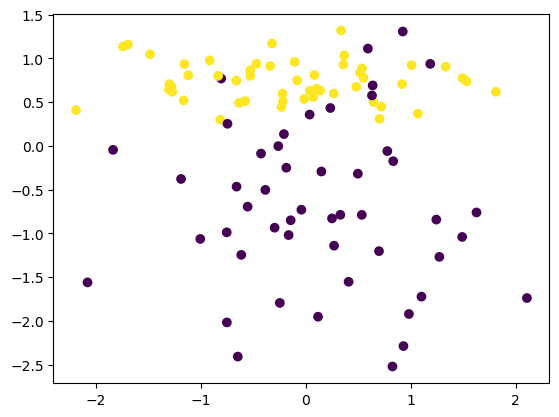

In [7]:
plt.scatter(coordinates[:,0], coordinates[:,1], c=labels)

## Обучающущая и тестовая выборки

In [8]:
coordinates_train, coordinates_test, labels_train, labels_test = train_test_split(coordinates, labels, test_size = 0.25, random_state=1)

##  Выборки на графиках

#### - обучающая

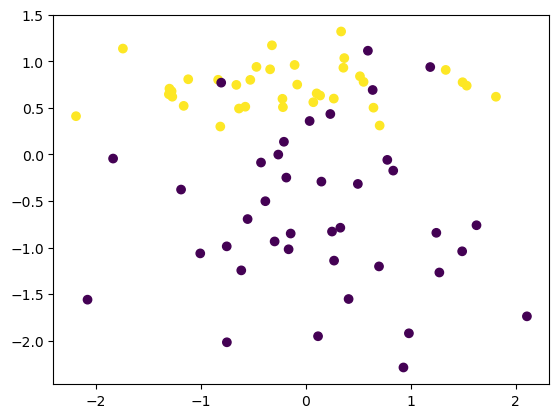

In [11]:
plt.scatter(coordinates_train[:,0], coordinates_train[:,1], c=labels_train)

#### - тестовая

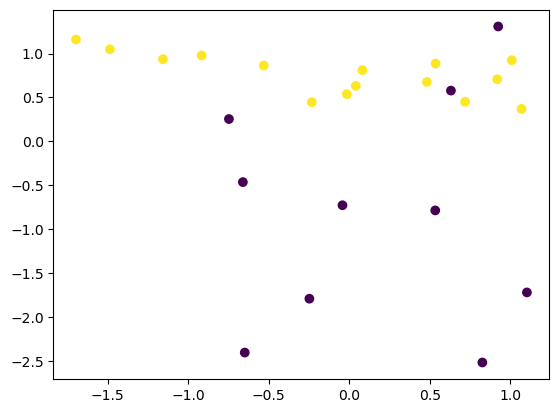

In [12]:
plt.scatter(coordinates_test[:,0], coordinates_test[:,1], c=labels_test)

##  Модели классификаторов

#### k-ближайших соседей

для n_neightbors =  1
Предстказанные и истинные значения
[0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1]
[1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1]
Матрица ошибок
[[ 8  2]
 [ 2 13]]
Точность классификации:  0.84
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.87      0.87      0.87        15

    accuracy                           0.84        25
   macro avg       0.83      0.83      0.83        25
weighted avg       0.84      0.84      0.84        25

Значение площади под кривой ошибок (AUC ROC)
0.8333333333333334
Область принятия решений


C:\Users\79046\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


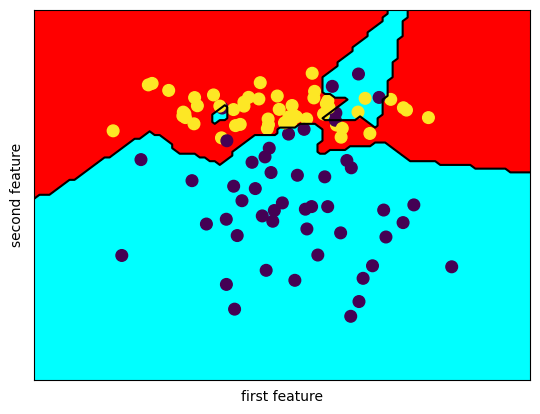

C:\Users\79046\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


для n_neightbors =  3
Предстказанные и истинные значения
[0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1]
[1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1]
Матрица ошибок
[[ 8  2]
 [ 2 13]]
Точность классификации:  0.84
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.87      0.87      0.87        15

    accuracy                           0.84        25
   macro avg       0.83      0.83      0.83        25
weighted avg       0.84      0.84      0.84        25

Значение площади под кривой ошибок (AUC ROC)
0.8333333333333334
Область принятия решений


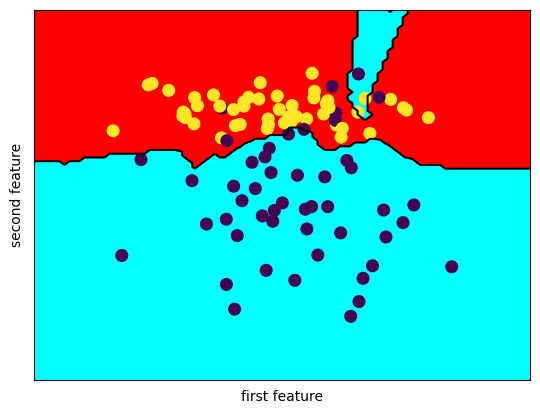

C:\Users\79046\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


для n_neightbors =  5
Предстказанные и истинные значения
[1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1]
[1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1]
Матрица ошибок
[[ 7  3]
 [ 2 13]]
Точность классификации:  0.8
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.81      0.87      0.84        15

    accuracy                           0.80        25
   macro avg       0.80      0.78      0.79        25
weighted avg       0.80      0.80      0.80        25

Значение площади под кривой ошибок (AUC ROC)
0.7833333333333333
Область принятия решений


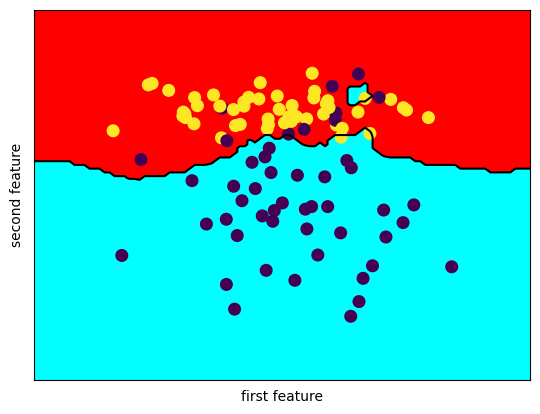

для n_neightbors =  9
Предстказанные и истинные значения
[1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1]
[1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1]
Матрица ошибок
[[ 7  3]
 [ 0 15]]
Точность классификации:  0.88
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.83      1.00      0.91        15

    accuracy                           0.88        25
   macro avg       0.92      0.85      0.87        25
weighted avg       0.90      0.88      0.87        25

Значение площади под кривой ошибок (AUC ROC)
0.85
Область принятия решений


C:\Users\79046\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


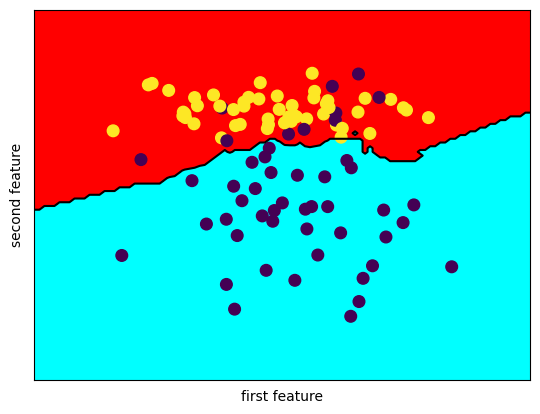

In [14]:
n = [1, 3, 5, 9]
for i in n:  
    kNN = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    kNN.fit(coordinates_train, labels_train)
    prediction = kNN.predict(coordinates_test)
    print("для n_neightbors = ", i)
    print_data(kNN, coordinates, labels, prediction, labels_test)

#### - Наивный байесовский метод

Предстказанные и истинные значения
[1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1]
[1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1]
Матрица ошибок
[[ 8  2]
 [ 0 15]]
Точность классификации:  0.92
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.88      1.00      0.94        15

    accuracy                           0.92        25
   macro avg       0.94      0.90      0.91        25
weighted avg       0.93      0.92      0.92        25

Значение площади под кривой ошибок (AUC ROC)
0.9
Область принятия решений


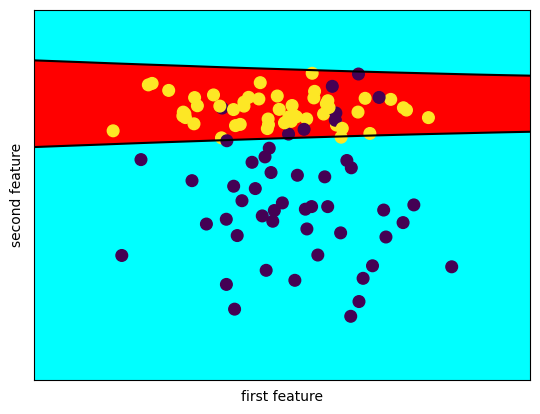

In [15]:
naive = GaussianNB()
naive.fit(coordinates_train, labels_train)
predict = naive.predict(coordinates_test)
print_data(naive, coordinates, labels, predict, labels_test)

#### - Случайный лес

для n_estimators =  5
Предстказанные и истинные значения
[1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1]
[1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1]
Матрица ошибок
[[10  0]
 [ 2 13]]
Точность классификации:  0.92
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

Значение площади под кривой ошибок (AUC ROC)
0.9333333333333333
Область принятия решений


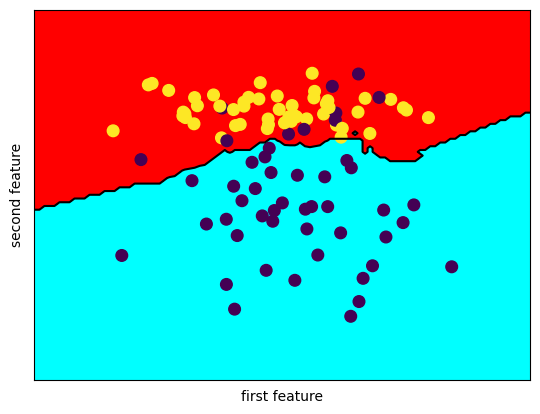

для n_estimators =  10
Предстказанные и истинные значения
[1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1]
[1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1]
Матрица ошибок
[[ 9  1]
 [ 3 12]]
Точность классификации:  0.84
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.92      0.80      0.86        15

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25

Значение площади под кривой ошибок (AUC ROC)
0.8500000000000001
Область принятия решений


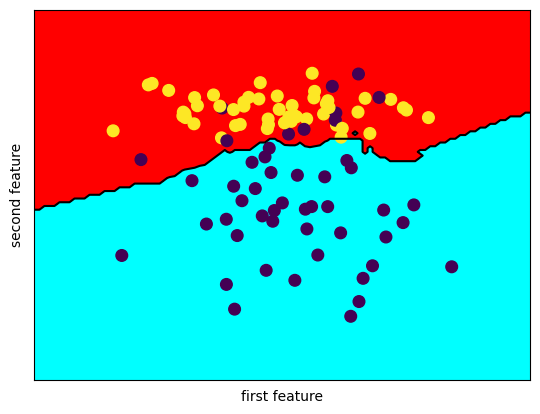

для n_estimators =  15
Предстказанные и истинные значения
[1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1]
[1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1]
Матрица ошибок
[[ 7  3]
 [ 4 11]]
Точность классификации:  0.72
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.79      0.73      0.76        15

    accuracy                           0.72        25
   macro avg       0.71      0.72      0.71        25
weighted avg       0.73      0.72      0.72        25

Значение площади под кривой ошибок (AUC ROC)
0.7166666666666667
Область принятия решений


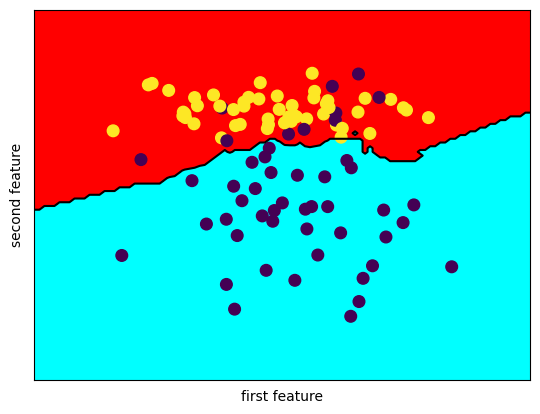

для n_estimators =  20
Предстказанные и истинные значения
[0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1]
[1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1]
Матрица ошибок
[[ 9  1]
 [ 3 12]]
Точность классификации:  0.84
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.92      0.80      0.86        15

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25

Значение площади под кривой ошибок (AUC ROC)
0.8500000000000001
Область принятия решений


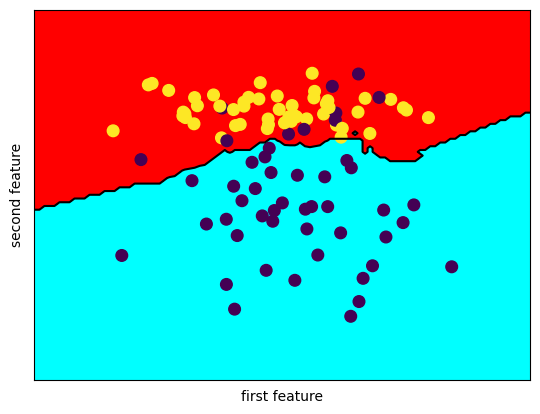

для n_estimators =  50
Предстказанные и истинные значения
[1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1]
[1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1]
Матрица ошибок
[[ 8  2]
 [ 1 14]]
Точность классификации:  0.88
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.88      0.93      0.90        15

    accuracy                           0.88        25
   macro avg       0.88      0.87      0.87        25
weighted avg       0.88      0.88      0.88        25

Значение площади под кривой ошибок (AUC ROC)
0.8666666666666668
Область принятия решений


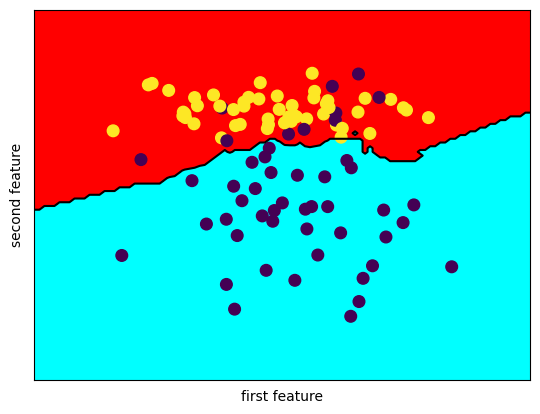

In [16]:
n = [5, 10, 15, 20, 50]
for i in n:  
    rand_forest = RandomForestClassifier(n_estimators=i)
    rand_forest.fit(coordinates_train, labels_train)
    prediction = rand_forest.predict(coordinates_test)
    print("для n_estimators = ", i)
    print_data(kNN, coordinates, labels, prediction, labels_test)